<a href="https://colab.research.google.com/github/Tommmster/diplodatos-2022-g20/blob/main/entregable_3_intro_ml/IntroML_Lab1_VersionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje Automático**

**Edición 2022**

---
## **Trabajo práctico entregable - Laboratorio 1**
---

## **Grupo 20**

**Integrantes:** Gastón Briozzo Ruales Fanny Tomas Niño Kehoe

**Profesor de Práctico:** Alejandro García

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston['DESCR'])   # descripción del dataset
#boston['data']           # matriz con los datos de entrada (atributos)
#boston['target']         # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

###1. ¿De qué se trata el conjunto de datos?

El conjunto de datos contiene información sobre 506 viviendas en Boston, correspondiente a 13 atributos numéricos o categóricos por vivienda, de los cuales se espera poder predecir el precio de estas, tambien incluidos en los datos como el conjunto 'target'.Boston house prices dataset, es un conjunto de datos derivado de la información recopilada por el Servicio del Censo de EE. UU. de 1970 sobre viviendas en el área de Boston Mass.

###2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable a predecir es el precio de la vivienda, correspondiente al conjunto 'target'.

###3. ¿Qué información (atributos) hay disponibles para hacer la predicción?

Contamos con un total de 13 atributos:
- CRIM:     Índice de criminalidad per cápita por ciudad
- ZN:       Proporción de terrenos residenciales con zonificación para lotes de más de 25.000 pies cuadrados.
- INDUS:    Proporción de acres comerciales no minoristas por ciudad
- CHAS:     Variable muda de Charles River (= 1 si el terreno linda con el río; 0 en caso contrario)
- NOX:      Concentración de óxidos nítricos (partes por 10 millones)
- RM:       Número medio de habitaciones por vivienda
- AGE:      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS:      Distancias ponderadas a cinco centros de empleo de Boston
- RAD:      Índice de accesibilidad a las autopistas radiales
- TAX:      Porcentaje del impuesto sobre bienes inmuebles por cada 10.000 dólares
- PTRATIO:  Proporción de alumnos por profesor por ciudad
- B:        1000(Bk - 0,63)^2 donde Bk es la proporción de personas de piel negra por ciudad
- LSTAT:    Porcentaje de la población de menor estatus
- MEDV:     Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

En este conjunto de datos la variable objetivo es MEDV, Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares, en otras palabras es el precio promedio de la vivienda expresado en miles.
###4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

El índice de criminalidad será sin duda determinante a la hora de evaluar el precio de una propiedad. Las zonas mas caras suelen contar con sistemas de seguridad y las personas prefieren vivir en lugares tranquilos.

La proporción del área comerciales no minorista suele ser un indicador de desarrollo. Generalmente en las poblaciones mas precarias predominan los negocios minoristas, mientras que los mas pudientes se asientan cerca de grandes conglomerados comerciales.

Si bien para una baja cantidad de habitaciones podría no haber correlación entre su número y el precio de la vivienda, el número medio de habitaciones estará sin duda correlacionado con el valor de la vivienda cuanto mayor sea su cantidad. Es decir, una casa con una habitación puede ser tanto un monoambiente como un penthouse, pero si el número de habitaciones es elevado, sin duda la casa es cara.

Algo similar ocurre con la edad de la construcción. Una construcción nueva puede ser barata o cara, pero al envejecer siempre pierde valor. 

La distancias a los centros de empleo será sin duda un factor que la gente de mayores ingresos tendrá en cuenta a la hora de elegir donde vivir. 

Finalmente, aunque se deba a cuentiones culturales relacionadas con la discriminación y el racismo, la proporción de personas de color y de menor estatus sin duda estará relacionada con el valor de la vivienda.<br>
RAD índice de accesibilidad a carreteras radiales <br>Cabe mencionar que la variable B y NOX fueron descartadas de esta seleccion debido a las advertencias brindadas en la documentacion de sklearn. Por un lado los autores de este conjunto de datos que tenian como objetivo analizar el impacto de la calidad del aire (NOX), no tuvo exito en la demostracion de esa hipotesis.<br> <br> Por otro lado, al incorporar la variable B a este conjunto de datos los autores asumieron que la autosegregacion racial tuvo un impacto positivo en el aumento de precios de las viviendas, tal como se indica en el analisis realizado por M. Carlisle,¿Destrucción de datos racista? (link mas abajo) se plantea en este un caso de rasismo sistematico, en el articulo "Debemos desempacar las matemáticas racistas para desmantelar su efecto." aqui hace una estudio de la variable B demostrando que la misma a su vez es una variable no Invertible, con lo cual no se puede lograr obtener los datos originales de la muestras realizadas en el Censo.<br><Br> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#rec2f484fdebe-2:~:text=%C2%BFDestrucci%C3%B3n%20de%20datos%20racista%3F%20M.%20Carlisle%2C<br>

###5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

El conjunto de datos discrimina las zonas por la proporción de personas negras y de personas con menor estatus. Esto es un claro prejuicio hacia estas poblaciones y conlleva el riesgo de generar una retroalimentación negativa en el modelo: asumimos que estas poblaciones habitan las viviendas de menor valor, por lo que no es preferible mudarse cerca de ellas, quitandole atractivo a la zona y reduciendo efectivamente su valor. Estos atributos del conjunto de datos revelan los sesgos de quienes los recolectaron y plantean un dilema ético: si bien es posible que exista en primera instancia una diferencia en el valor de la vivienda en función de las poblaciones locales, usar esto como parámetro para modelar puede reforzar el racismo y la discriminación.  

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

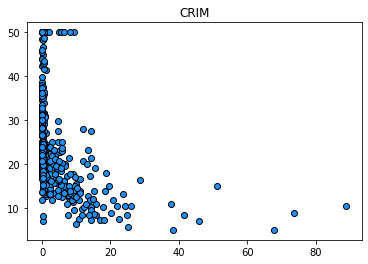

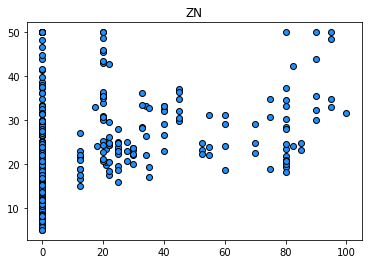

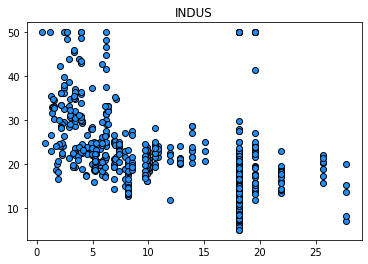

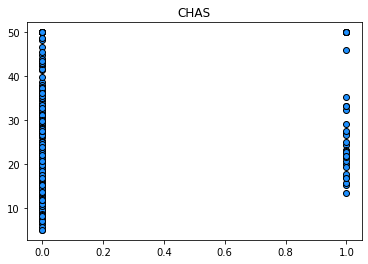

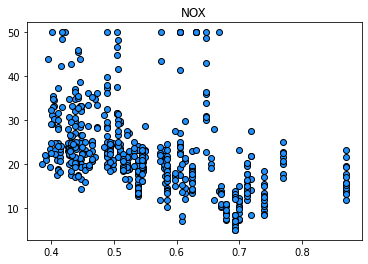

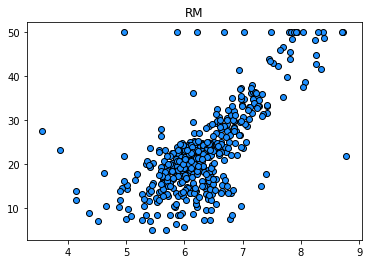

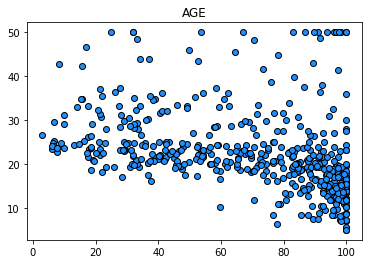

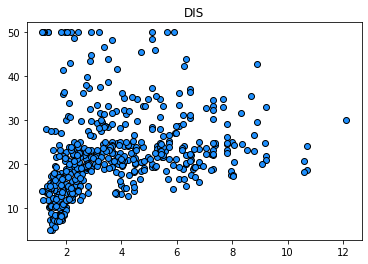

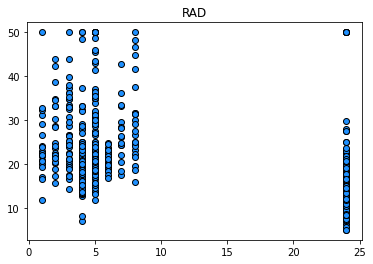

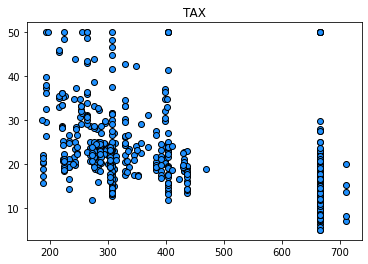

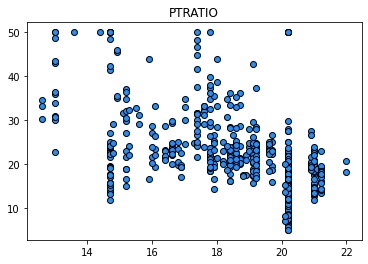

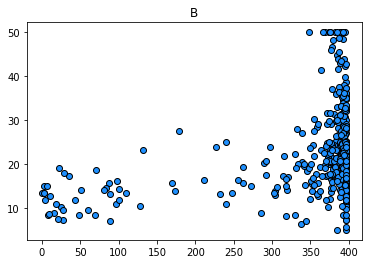

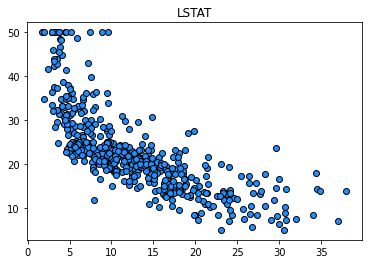

In [ ]:
# 1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.

for feature in boston['feature_names']:
    selector = (boston['feature_names'] == feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(feature)
    plt.show()

2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.

- CRIM: 

Correlación: Alta.

Vemos que a altas tasas de criminalidad no hay viviendas de alto valor. Sin embargo, a bajos índices de criminalidad el valor de las viviendas está 'homogéneamente' distribuido.

- ZN:

Correlación: Baja.

Vemos que cuando la proporción de terrenos con zonificación es muy alta, las viviendas suelen ser costosas. Sin embargo, no se aprecia una clara relación para valores medianos o bajos.  

- INDUS:

Correlación: Media.

Vemos que el precio de la vivienda disminuye conforme aumenta la proporción de comercios no minoristas, contrario a lo que se sugirió anteriormente.

- CHAS:

Correlación: Nula.

No vemos una clara correlación entre tener acceso al río y el precio de la casa. Para las casas sin acceso vemos que los valores son mas extremos, pero esto puede deberse al simple hecho de que hay mas datos de este tipo.

- NOX:

Correlación: Media.

Vemos que el valor de las viviendas disminuye conforme aumenta la concentración de óxidos nítricos.

- RM:

Correlación: Alta.

Vemos claramente que al incrementar el número de habitaciones sube el valor de la propiedad.

- AGE:

Correlación: Media.

Vemos que el valor de las casas en general disminuye con la edad de estas. Sin embargo, muchas viviendas conservan un alto precio a pesar de la edad.

- DIS:

Correlación: Media.

Contrario a lo esperado, vemos que el valor de las viviendas aumenta con la distancia a los centros de empleo. Esta relación es muy fuerte a distancias bajas, pero se vuelve mas débil conforme esta aumenta. 

- RAD:

Correlación: Baja.

No vemos una tendencia entre la accesibilidad a las autopistas y el valor de las viviendas, a menos que la distancia sea excesiva, en cuyo caso parece disminuir el precio.

- TAX:

Correlación: Media.

Vemos que el valor de la vivienda parece disminuir con el porcentaje de impuestos. Sin embargo esta relación no es del todo clara.

- PTRATIO:

Correlación: Media.

Vemos que al aumentar el porcentaje de alumnos por profesor el valor de las casas parece disminuir.

- B:

Correlación: Alta.

Vemos que a valores bajos de B las casas tiene precios bajos. Para valores altos de B el valor de las viviendas tiende a distribuirse mas homogéneamente. 

- LSTAT:

Correlación: Alta.

Vemos claramente que conforme aumenta el porcentaje que personas con menor estatus disminuye el valor de las viviendas.

3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

En orden:

Porcentaje de la población de menor estatus

  1.   Porcentaje de la población de menor estatus
  2.   Número medio de habitaciones por vivienda
  3.   Índice de criminalidad per cápita por ciudad
  4.   Proporción de personas de color

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Seleccione un solo atributo que considere puede ser el más apropiado.

feature = 'RM'  # selecciono el atributo 'RM' 'CRIM' 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# 2. Instancie una regresión lineal de scikit-learn, y entrénela usando sólo el atributo seleccionado.

# Esta primera parte cambia las listas por arrays, para no tener problemas de shape

X_rl = []
for val in X[:, selector]:
  X_rl.append(val[0])
X_rl = np.array(X_rl)

X_train_rl = []
for val in X_train_f:
  X_train_rl.append(val[0])
X_train_rl = np.array(X_train_rl)

X_test_rl = []
for val in X_test_f:
  X_test_rl.append(val[0])
X_test_rl = np.array(X_test_rl)

print(X_rl.shape, X_train_rl.shape, X_test_rl.shape)

# Copiamos las funciones del colab Regresión

def linear_least_squares(X_rl, y):
    X_b = np.stack((X_rl, np.ones(X_rl.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X_rl, w):
    X_b = np.stack((X_rl, np.ones(X_rl.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

w = linear_least_squares(X_train_rl, y_train)

w

(506,) (404,) (102,)


array([  9.37638431, -36.47618963])

In [ ]:
# 3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.

# Valores predichos

y_train_pred = f(X_train_rl, w)
y_test_pred = f(X_test_rl, w)

# Comparamos con los valores reales

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
print(f'Error cuadrático medio en el conjunto de Entrenamiento: {train_error:f}')
print(f'Error cuadrático medio en el conjunto de Evaluación   : {val_error:f}')

Error cuadrático medio en el conjunto de Entrenamiento: 42.820479
Error cuadrático medio en el conjunto de Evaluación   : 46.907352


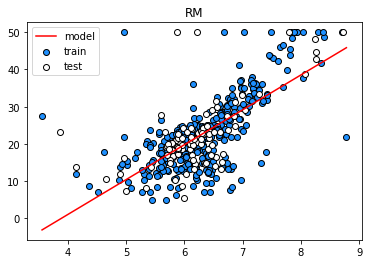

In [ ]:
# 4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.

x_start = min(np.min(X_train_rl), np.min(X_test_rl))
x_end = max(np.max(X_train_rl), np.max(X_test_rl))
x = np.linspace(x_start, x_end, 200)#.reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_rl, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_rl, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, f(x, w), color="red", label="model")
plt.title(feature)
plt.legend()
plt.show()

5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

La relación entre el número de cuartos y el valor de la propiedad parece ser casi lineal, mas una dada dispersión, por lo que este modelo se ajusta en gran forma a los datos, dando un error cuadrático medio menor a 50 tanto en el conjunto de entrenamiento como en el de validación. De todas formas, vemos que esta relación sería mejor descrita por una curva, por lo que esperamos aumentar la precisión al emplear una regresión polinomial.


## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
X_train_rp = X_train_rl.reshape(-1, 1)


In [ ]:
# 1. Para varios grados de polinomio, haga lo siguiente:
#    1. Instancie y entrene una regresión polinomial.
#    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
#    3. Guarde los errores en una lista.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train_rp = X_train_rl.reshape(-1, 1)
X_test_rp = X_test_rl.reshape(-1, 1)

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree) # genera todos los monomios hasta degree(10). Esto nos da la llamada matriz de Vandermonde con n_samplesfilas y columnas:degree + 1
    lr = LinearRegression(fit_intercept=False)  #Si se establece en False, no se utilizará ninguna intersección en los cálculos (es decir, se espera que los datos estén centrados)
    model = make_pipeline(pf, lr)
    model.fit(X_train_rp, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_rp)
    y_test_pred = model.predict(X_test_rp)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
#imprima los valores
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 3.3e+01
Test error: 4.5e+01


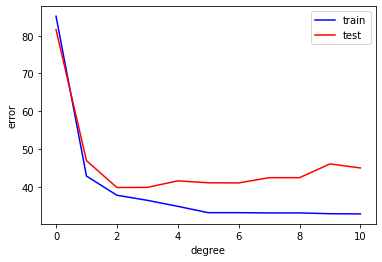

In [ ]:
# 2. Grafique las curvas de error en términos del grado del polinomio.

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.

Vemos que el ajuste resulta sumamente impreciso tanto para polinomios de grado bajo como alto. Cuando el grado del polinomio es bajo, el error parece decaer exponencialmente con este, alcanzando un valor relativamente constante entre los grados 4 y 9. Sin embargo, para polinomios de grado 10 o mayor el error diverge sumamente rápido, indicando que estamos sobreajustando los datos. Si bien el error en el conjunto de prueba es mínimo para el polinomio de grado 7, este no difiere demasiado del el error cometido por el polinomio de grado 4. Con esto en mente, y considerando que debemos mantener al modelo lo mas simple posible para mejorar su performance, concluimos que el polinomio de grado 4 es el modeló óptimo para ajustar este conjunto de datos.

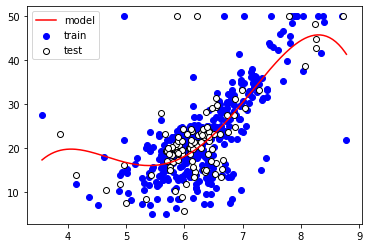

Error cuadrático medio en el conjunto de Entrenamiento: 34.808446
Error cuadrático medio en el conjunto de Evaluación   : 41.553926


In [ ]:
# 4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.

degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_rp, y_train)

plt.scatter(X_train_rp, y_train, color="blue", label="train")
plt.scatter(X_test_rp, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

print(f'Error cuadrático medio en el conjunto de Entrenamiento: {train_errors[degree]:f}')
print(f'Error cuadrático medio en el conjunto de Evaluación   : {test_errors[degree]:f}')

5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

Vemos que el modelo ajusta en gran medida a los datos del conjunto, obteniendo un error cuadrático medio menor al alcanzado por la regresión lineal tanto en el conjunto de entrenamiento como en el de evaluación. Sin embargo, también es posible ver que, en los extremos del intervalo al que pertenecen los datos, la curva de predicción está por tomar un comportamiento que no se condice con lo que se esperaría de los datos. Esto nos habla de un posible error de sesgo y sugiere que nuestro modelo tiene un determinado rango de validez. De todas formas, dentro de este rango la presición del modelo es sumamente satisfactoria.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Seleccione dos o tres atributos entre los más relevantes encontrados en el ejercicio 2.

selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

[-3.43413304 -0.14041301  5.35345027 -0.56782244]
[ 6.53273371e+01  2.22101786e+00 -1.61332595e+01 -8.90400191e-01
  4.91808529e-03 -3.12676166e-01 -3.71434308e-02  1.76581959e+00
 -7.67139462e-02  2.90646524e-02]
[ 3.43778561e+01  9.15747524e+00 -1.78529236e+01  4.67695360e+00
 -5.91644468e-02  2.13896912e-01 -8.16994240e-01  4.01599234e+00
 -1.99186496e+00  1.53918297e-01 -5.13258542e-05  9.08435753e-03
  7.48605576e-04 -1.81096811e-01  7.05659306e-02  8.34356918e-03
 -1.90890815e-01  1.47302249e-01 -6.57943912e-03 -2.34781191e-03]
[-4.57794995e+02  1.03512535e+02  3.64266610e+02 -7.57503110e+01
  1.42791885e+00 -4.25070149e+01 -3.91504488e+00 -1.03365030e+02
  3.79180065e+01  3.91980823e-01  8.65313710e-04 -4.33290663e-01
 -1.76983591e-02  6.56765656e+00  7.01526605e-01  8.86751345e-02
  1.26615627e+01 -6.13804376e+00 -1.64459490e-01 -6.79940630e-05
  5.11621223e-06 -3.27994317e-04  9.92972739e-06  3.25035030e-02
  3.58697957e-03 -7.14188225e-05 -3.58769028e-01 -3.77883906e-02
 -7.3

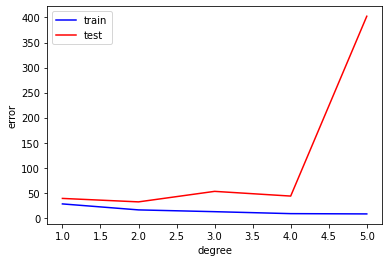

Error cuadrático medio en el conjunto de Entrenamiento: 15.833820
Error cuadrático medio en el conjunto de Evaluación   : 31.846828


In [ ]:
# 2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.

train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    X_pf_train = pf.fit_transform(X_train_fs)
    X_pf_test = pf.fit_transform(X_test_fs)
    lr.fit(X_pf_train, y_train)

    # pf.algo para preguntar cuantas features de salida voy a tener
    # lr.coef_o preguntar a lr cuantos coeficientes tiene
    print(lr.coef_)

#    poly_reg_y_predicted = lr.predict(X_test)
#    from sklearn.metrics import mean_squared_error
#    poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
#    poly_reg_rmse

#    model = make_pipeline(pf, lr)
#    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = lr.predict(X_pf_train)
    y_test_pred = lr.predict(X_pf_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

print(f'Error cuadrático medio en el conjunto de Entrenamiento: {train_errors[1]:f}')
print(f'Error cuadrático medio en el conjunto de Evaluación   : {test_errors[1]:f}')

3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

Vemos que, en general, la performance de la regresión con más de un atributo es superior a la performance de la regresión con un solo atributo cuando consideramos polinomios de grado bajo. En este régimen, el error cuadrático medio tanto en el conjunto de entrenamiento como en el conjunto de evaluación son menores a los obtenidos empleando un único atributo. Además, el error mínimo en el conjunto de evaluación es alcanzado rápidamente, para polinomios de tan solo grado 2. Esto podría deberse a que los distintos atributos se complementan en la información que ofrecen al sistema, reforzando el modelo y dándole mas robustez y precisión.

Por otro lado, el error por overfeeding diverge mas rápidamente (para polinomios de grado mas pequeño) al incrementar el número de atributos considerados. Esto puede deberse a que el número de coeficientes de la regresión crece exponencialmente tanto con el número de atributos como con el grado del polinomio, introduciendo errores significativos.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
